In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [9]:
#filename = "ah78_long.csv"
filename = "ah78_month.csv"
#filename = "ah78_week.csv"

ts = pd.read_csv("simple_"+filename, index_col=0)
ts.index = pd.DatetimeIndex(ts.index.values, freq="5min")
ts.describe()


,y,a,b,c,h,yy,dy,B
count,7957.000000,8064.000000,8064.000000,8064.000000,3066.000000,8064.000000,8063.000000,8064.000000
mean,6.335716,5.135185,0.162712,0.606647,68.751931,6.340375,-0.000633,0.162680
std,1.785341,16.261032,0.473934,4.299443,16.504785,1.786439,0.289426,0.060509
min,2.164790,0.000000,0.000000,0.000000,41.000000,2.164790,-2.053780,0.043988
25%,4.995670,0.000000,0.000000,0.000000,58.500000,4.995670,-0.166520,0.115482
50%,6.050320,0.813500,0.063532,0.000000,66.000000,6.050320,0.000000,0.155945
75%,7.493510,2.853500,0.119538,0.000000,73.500000,7.493510,0.111020,0.201714
max,12.655700,192.893043,7.592103,60.000000,168.500000,12.655700,1.720730,0.520829


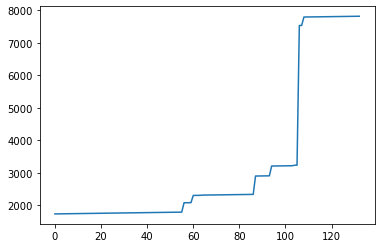

1776

In [11]:
fp_list = [i for i in range(len(ts.fp)) if ts.fp.iloc[i]]

plt.plot(fp_list)
plt.show()


In [12]:
import statsmodels.api as sm


In [14]:
mod = sm.tsa.statespace.SARIMAX(ts["yy"], exog=ts[["a","b","c"]], order=(2,0,2), trend='c')
res = mod.fit(disp=False, maxiter=250)
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                     yy   No. Observations:                 8064
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 404.043
Date:                Thu, 05 May 2022   AIC                           -790.086
Time:                        12:56:23   BIC                           -727.129
Sample:                    02-01-2022   HQIC                          -768.545
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1535      0.012     12.765      0.000       0.130       0.177
a              0.0011      0.000      3.109      0.002       0.000       0.002
b              0.0067      0.003      2.039      0.0

In [15]:
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [56]:
j = fp_list[108]
#j = np.random.choice(fp_list)

predict_dy = res.get_prediction(dynamic=j)
predict_dy_ci = predict_dy.conf_int()

j, predict_dy.predicted_mean.shape, predict_dy_ci.shape, predict_dy_ci.iloc[j-100:j+100,0].shape


(7795, (8064,), (8064, 2), (200,))

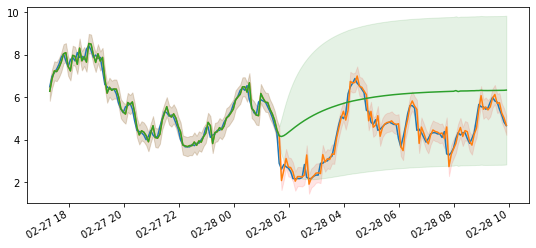

In [57]:
fig, ax = plt.subplots(figsize=(9,4))
ts.iloc[j-100:j+100]["yy"].plot()

plt.plot(ts.index[j-100:j+100], predict.predicted_mean[j-100:j+100])
ci = predict_ci.values
ax.fill_between(ts.index[j-100:j+100], ci[j-100:j+100,0], ci[j-100:j+100,1], color='r', alpha=0.1)

plt.plot(ts.index[j-100:j+100], predict_dy.predicted_mean[j-100:j+100])
ci = predict_dy_ci.values
ax.fill_between(ts.index[j-100:j+100], ci[j-100:j+100,0], ci[j-100:j+100,1], color='g', alpha=0.1)

plt.show()